In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Score.csv")
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,23.000,7.000,3.000,34.664,378.000,No,60.971,479.866,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99956,18.000,7.000,3.000,40.566,379.000,No,54.186,496.652,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99957,27.000,6.000,3.000,41.256,380.000,No,24.028,516.809,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99958,20.000,6.000,3.000,33.638,381.000,No,251.673,319.165,Standard,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [5]:
df[df.select_dtypes(include=['object', 'category']).columns].describe().T

,count,unique,top,freq
Payment_of_Min_Amount,99960,3,Yes,52326
Credit_Score,99960,3,Standard,53149
Credit_Mix,99960,3,Standard,45832
Payment_Behaviour,99960,6,Low_spent_Small_value_payments,33912


In [6]:
df.Credit_Score.value_counts()

Credit_Score
Standard    53149
Poor        28988
Good        17823
Name: count, dtype: int64

In [7]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    45832
Good        30360
Bad         23768
Name: count, dtype: int64

In [8]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: count, dtype: int64

- "Payment_of_Min_Amount" ifadesi, müşterilerin kredi kartı veya kredi ödemelerinde belirli bir minimum tutarı ödeme durumunu ifade edebilir. "Yes" (Evet) olması durumunda minimum ödeme yapılmış demektir, "No" (Hayır) olması durumunda minimum ödeme yapılmamış demektir.

In [9]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    52326
No     35628
NM     12006
Name: count, dtype: int64

In [10]:
df.isnull().sum().any()

False

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,99960.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,99960.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,99960.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,99960.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,99960.000,193.665,194.783,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,99960.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,99960.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,99960.000,50498.704,38294.243,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,99960.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


## Encoding

In [12]:
df_encoded = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
df = pd.concat([df, df_encoded['Payment_of_Min_Amount_Yes']], axis=1)
df = pd.concat([df, df_encoded['Payment_of_Min_Amount_No']], axis=1)
df = df.drop('Payment_of_Min_Amount', axis=1)

In [13]:
df['Payment_of_Min_Amount_Yes'] = df['Payment_of_Min_Amount_Yes'].astype(int)
df['Payment_of_Min_Amount_No'] = df['Payment_of_Min_Amount_No'].astype(int)

In [14]:
df_encoded = pd.get_dummies(df['Payment_Behaviour'], prefix='Payment_Behaviour').astype(int)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('Payment_Behaviour', axis=1)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']], dtype=int)
df['Credit_Mix'] = ordinal_encoder.fit_transform(df[['Credit_Mix']])

In [16]:
ordinal_encoder2 = OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']], dtype=int)
df['Credit_Score'] = ordinal_encoder2.fit_transform(df[['Credit_Score']])

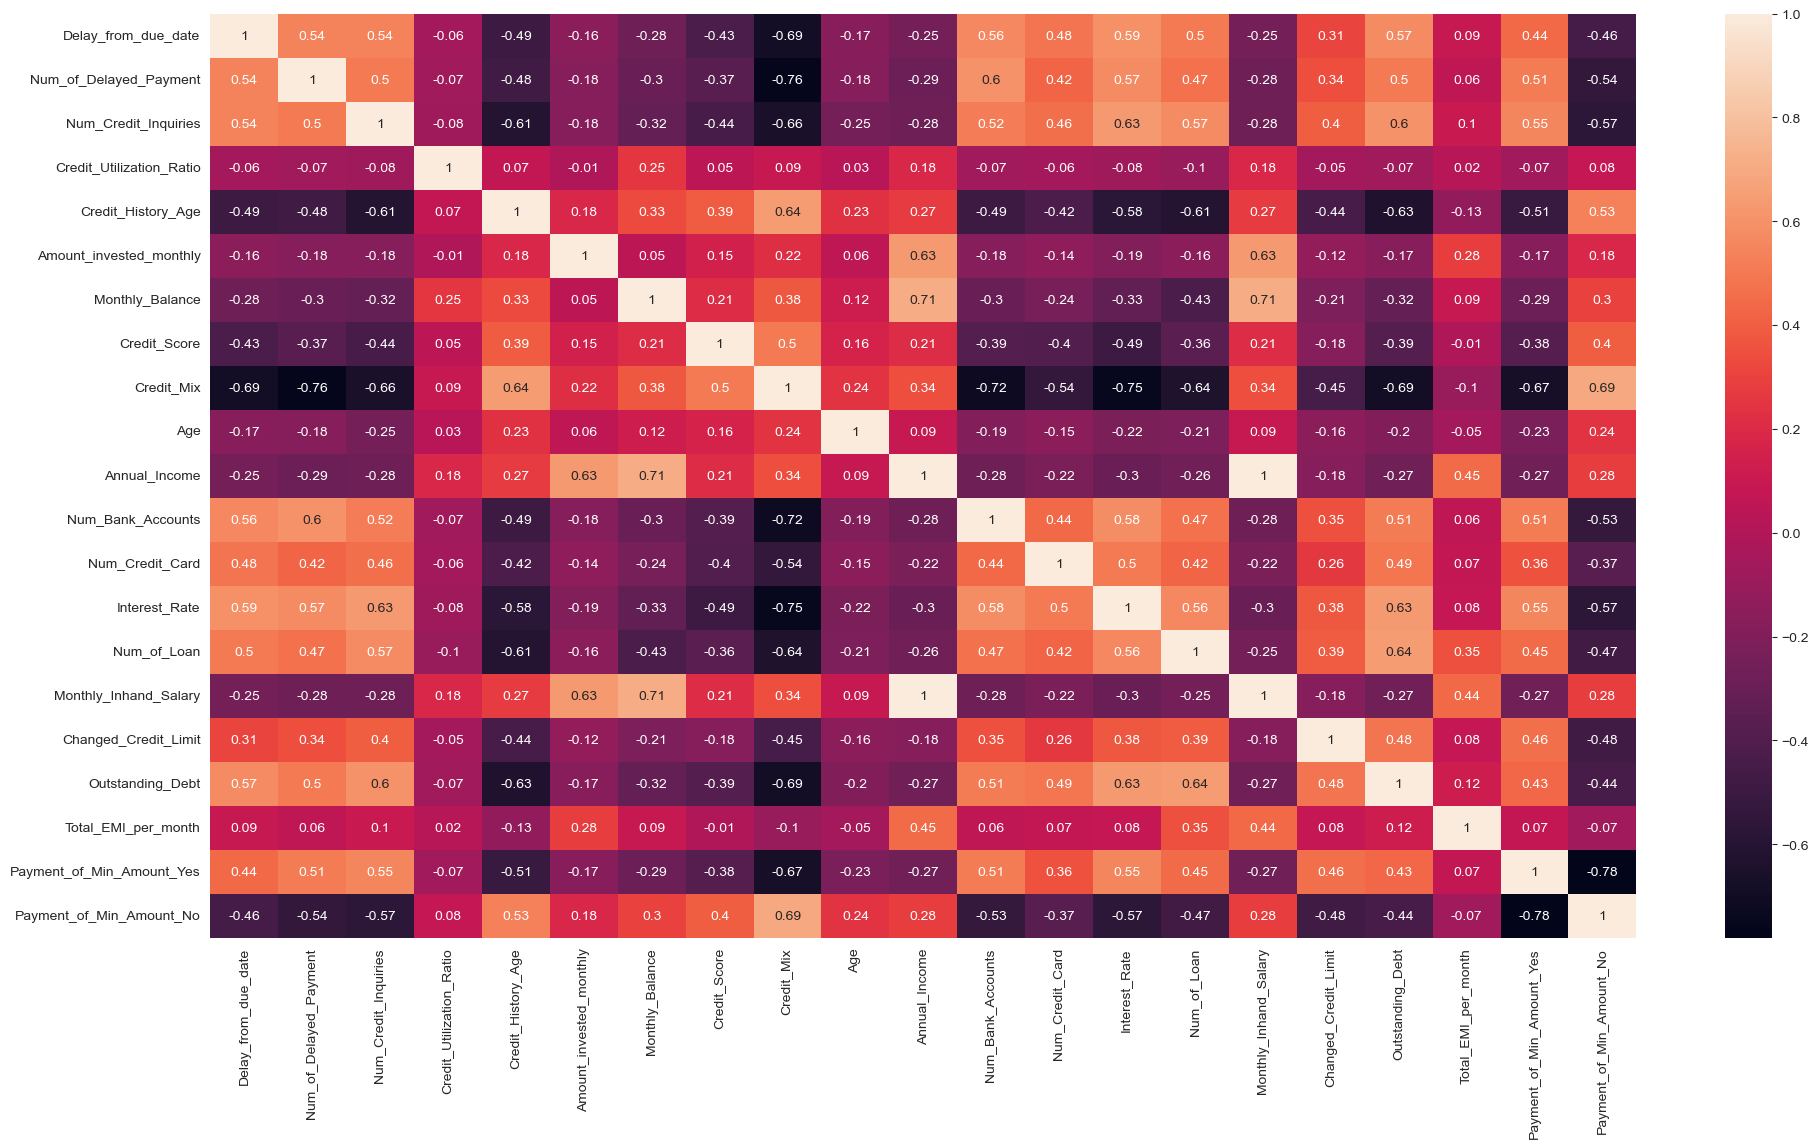

In [17]:
plt.figure(figsize = (23, 12))
sns.heatmap(df.iloc[:,:21].corr().round(2), annot = True);

In [18]:
df.drop('Annual_Income', axis=1, inplace=True)

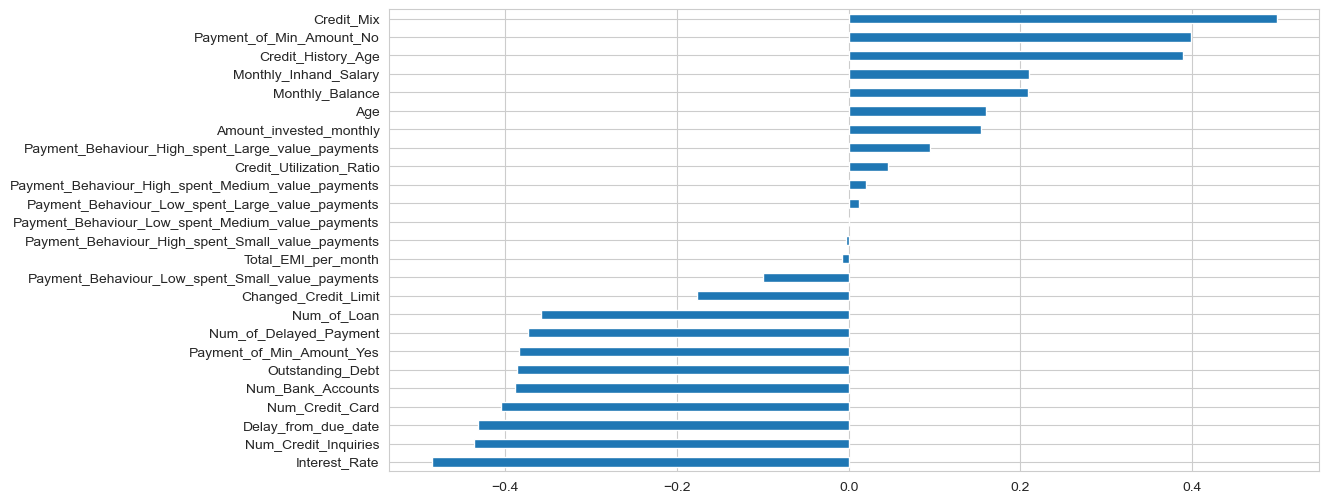

In [19]:
df.corr()['Credit_Score'][~df.corr()['Credit_Score'].index.isin(['Credit_Score'])].sort_values().plot.barh();

- - - - - - - - - - - - - -

In [3]:
df = pd.read_csv("Adjusted_Score.csv")

# Modelling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [5]:
X = df.drop('Credit_Score', axis=1).values
y = df['Credit_Score'].values
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.1, random_state=74)

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adam

In [54]:
tf.random.set_seed(74)

model = Sequential()

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))

model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(3, activation="softmax"))

opt = Adam(lr=0.003)
model.compile(optimizer=opt, 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [55]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=35, restore_best_weights=True)

In [56]:
model.fit(x=X_train, y=y_train, validation_split= 0.1, batch_size=32,
          epochs=500, verbose=1, callbacks=[early_stop]) # , class_weight={0: 1/28.99, 1: 1/53.18, 2: 1/17.83}

Epoch 1/500
2531/2531 [==============================] - 8s 2ms/step - loss: 0.7421 - accuracy: 0.6649 - val_loss: 0.7010 - val_accuracy: 0.6946
Epoch 2/500
2531/2531 [==============================] - 5s 2ms/step - loss: 0.6985 - accuracy: 0.6901 - val_loss: 0.6937 - val_accuracy: 0.7003
Epoch 3/500
2531/2531 [==============================] - 5s 2ms/step - loss: 0.6903 - accuracy: 0.6945 - val_loss: 0.6856 - val_accuracy: 0.7010
Epoch 4/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.6834 - accuracy: 0.6986 - val_loss: 0.6822 - val_accuracy: 0.7028
Epoch 5/500
2531/2531 [==============================] - 5s 2ms/step - loss: 0.6813 - accuracy: 0.7010 - val_loss: 0.6837 - val_accuracy: 0.6998
Epoch 6/500
2531/2531 [==============================] - 5s 2ms/step - loss: 0.6785 - accuracy: 0.7013 - val_loss: 0.6786 - val_accuracy: 0.7078
Epoch 7/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.6744 - accuracy: 0.7028 - val_loss: 0.6736 - val_ac

2531/2531 [==============================] - 6s 2ms/step - loss: 0.5506 - accuracy: 0.7643 - val_loss: 0.5709 - val_accuracy: 0.7613
Epoch 114/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5494 - accuracy: 0.7652 - val_loss: 0.5721 - val_accuracy: 0.7636
Epoch 115/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5493 - accuracy: 0.7656 - val_loss: 0.5698 - val_accuracy: 0.7587
Epoch 116/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5498 - accuracy: 0.7637 - val_loss: 0.5662 - val_accuracy: 0.7620
Epoch 117/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5494 - accuracy: 0.7655 - val_loss: 0.5604 - val_accuracy: 0.7667
Epoch 118/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5478 - accuracy: 0.7659 - val_loss: 0.5636 - val_accuracy: 0.7661
Epoch 119/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5470 - accuracy: 0.7646 - val_loss: 0.5743 - val_ac

Epoch 169/500
2531/2531 [==============================] - 6s 3ms/step - loss: 0.5322 - accuracy: 0.7723 - val_loss: 0.5456 - val_accuracy: 0.7757
Epoch 170/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5316 - accuracy: 0.7731 - val_loss: 0.5531 - val_accuracy: 0.7698
Epoch 171/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5314 - accuracy: 0.7726 - val_loss: 0.5469 - val_accuracy: 0.7748
Epoch 172/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5309 - accuracy: 0.7742 - val_loss: 0.5489 - val_accuracy: 0.7758
Epoch 173/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5302 - accuracy: 0.7739 - val_loss: 0.5492 - val_accuracy: 0.7721
Epoch 174/500
2531/2531 [==============================] - 8s 3ms/step - loss: 0.5306 - accuracy: 0.7735 - val_loss: 0.5485 - val_accuracy: 0.7713
Epoch 175/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5313 - accuracy: 0.7727 - val_loss: 0

Epoch 225/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5187 - accuracy: 0.7789 - val_loss: 0.5375 - val_accuracy: 0.7786
Epoch 226/500
2531/2531 [==============================] - 6s 3ms/step - loss: 0.5217 - accuracy: 0.7777 - val_loss: 0.5411 - val_accuracy: 0.7748
Epoch 227/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5189 - accuracy: 0.7784 - val_loss: 0.5383 - val_accuracy: 0.7759
Epoch 228/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5191 - accuracy: 0.7793 - val_loss: 0.5397 - val_accuracy: 0.7744
Epoch 229/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5199 - accuracy: 0.7786 - val_loss: 0.5356 - val_accuracy: 0.7791
Epoch 230/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5181 - accuracy: 0.7792 - val_loss: 0.5394 - val_accuracy: 0.7783
Epoch 231/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5204 - accuracy: 0.7773 - val_loss: 0

Epoch 281/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5121 - accuracy: 0.7814 - val_loss: 0.5289 - val_accuracy: 0.7797
Epoch 282/500
2531/2531 [==============================] - 6s 3ms/step - loss: 0.5124 - accuracy: 0.7811 - val_loss: 0.5347 - val_accuracy: 0.7790
Epoch 283/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5143 - accuracy: 0.7801 - val_loss: 0.5341 - val_accuracy: 0.7790
Epoch 284/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5124 - accuracy: 0.7825 - val_loss: 0.5276 - val_accuracy: 0.7809
Epoch 285/500
2531/2531 [==============================] - 6s 2ms/step - loss: 0.5108 - accuracy: 0.7829 - val_loss: 0.5349 - val_accuracy: 0.7803
Epoch 286/500
2531/2531 [==============================] - 7s 3ms/step - loss: 0.5129 - accuracy: 0.7818 - val_loss: 0.5299 - val_accuracy: 0.7790
Epoch 287/500
2531/2531 [==============================] - 6s 3ms/step - loss: 0.5118 - accuracy: 0.7812 - val_loss: 0

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3328      
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_6 (Bat  (None, 64)               

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head(2)

""


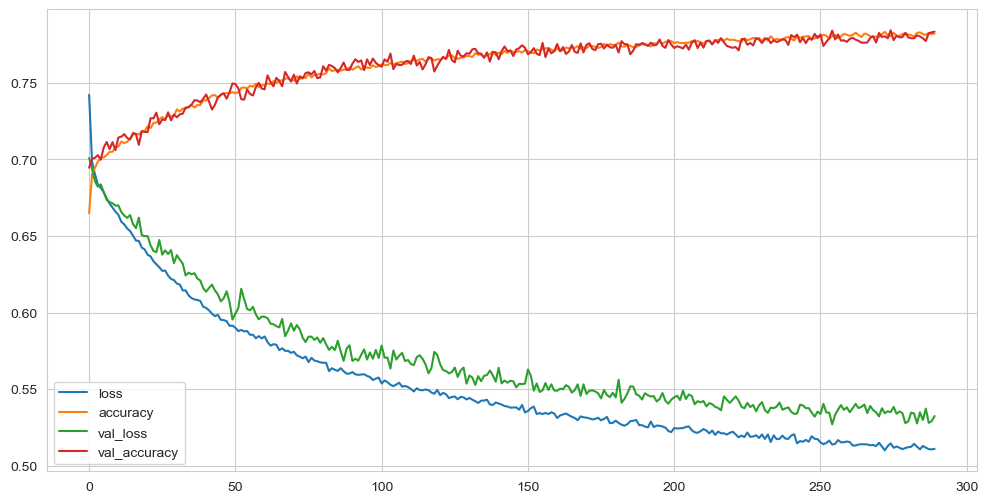

In [59]:
loss_df.plot();

In [65]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
average_precision_score(y_test, y_pred) 

313/313 [==============================] - 0s 1ms/step


0.7822782657393735

In [64]:
from sklearn.metrics import f1_score
print(f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')) 
print(f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro'))

0.7621439633919741
0.7710084033613446


In [67]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1)))
    print(classification_report(y_train.argmax(axis=1), y_train_pred.argmax(axis=1)))

In [68]:
eval_metric(model, X_train, y_train, X_test, y_test)

313/313 [==============================] - 0s 1ms/step
Test_Set
[[2382  476   41]
 [ 777 3987  551]
 [  18  426 1338]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2899
           1       0.82      0.75      0.78      5315
           2       0.69      0.75      0.72      1782

    accuracy                           0.77      9996
   macro avg       0.75      0.77      0.76      9996
weighted avg       0.77      0.77      0.77      9996


Train_Set
[[22627  3333   129]
 [ 6121 37593  4120]
 [   58  3047 12936]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.82     26089
           1       0.85      0.79      0.82     47834
           2       0.75      0.81      0.78     16041

    accuracy                           0.81     89964
   macro avg       0.80      0.82      0.81     89964
weighted avg       0.82      0.81      0.81     89964

